In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    x2 = d1.sample((n,))
    x3 = d0.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([torch.cat([x0, x1], 0), torch.cat([x2, x3], 0)], 1), torch.cat([y0, y1], 0)

d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

layer = nn.Linear(2, 1) # скорректирован размер матрицы для перемножения 2-мерных входных данных
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

[tensor([ 0.6268, -0.5166]), tensor(0.3277)]
Ошибка после 0 итераций: 0.111397
Ошибка после 1 итераций: 0.097126
Ошибка после 2 итераций: 0.087097
Ошибка после 3 итераций: 0.080571
Ошибка после 4 итераций: 0.075179
Ошибка после 5 итераций: 0.070825
Ошибка после 6 итераций: 0.067176
Ошибка после 7 итераций: 0.064437
Ошибка после 8 итераций: 0.062265
Ошибка после 9 итераций: 0.060417
Ошибка после 10 итераций: 0.058465
Ошибка после 11 итераций: 0.056488
Ошибка после 12 итераций: 0.055371
Ошибка после 13 итераций: 0.054295
Ошибка после 14 итераций: 0.053242
Ошибка после 15 итераций: 0.052824
Ошибка после 16 итераций: 0.051152
Ошибка после 17 итераций: 0.050405
Ошибка после 18 итераций: 0.049944
Ошибка после 19 итераций: 0.048993


Text(0.5, 1.0, 'Разделенные данные')

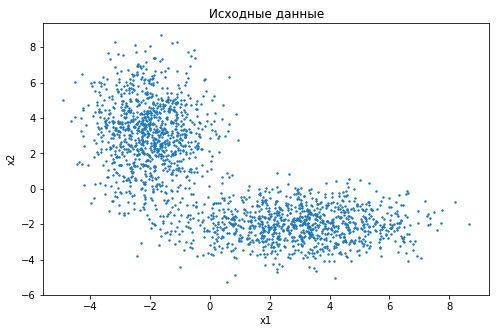

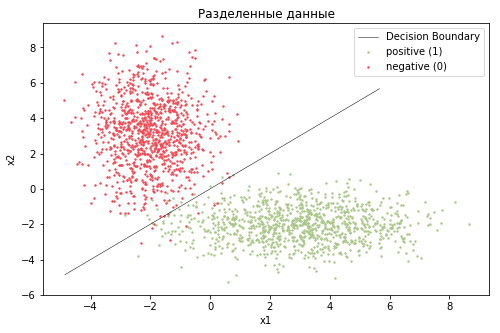

In [36]:
# Исходные данные
plt.figure(figsize=(8,5))
plt.scatter(x[:, 0], x[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Исходные данные')

# Разделенные данные
data = torch.cat([x, y], 1)
x1_pos = data[:, 0][data[:, 2] == 1]
x2_pos = data[:, 1][data[:, 2] == 1]
x1_neg = data[:, 0][data[:, 2] == 0]
x2_neg = data[:, 1][data[:, 2] == 0]

plt.figure(figsize=(8,5))
plt.scatter(x1_pos, x2_pos, s=2, color='#AAC789', label='positive (1)')
plt.scatter(x1_neg, x2_neg, s=2, color='#F34A53', label='negative (0)')
plt.plot([float(x1_pos.min())-2, float(x2_neg.max())-3],
         [float(x1_pos.min())-2, float(x2_neg.max())-3],
         lw=0.5, color='#000000', label='Decision Boundary')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Разделенные данные')

viridis - d0
coolwarm - d1
green - positive (1)
red - negative (0)


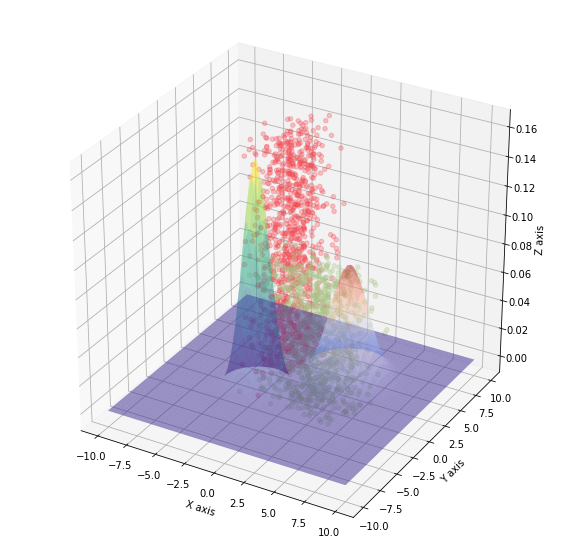

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x0 = mu_y0 = mu0
variance_x0 = variance_y0 = sigma0

mu_x1 = mu_y1 = mu1
variance_x1 = variance_y1 = sigma1

#Create grid and multivariate normal
x = np.linspace(-10, 10, 5000)
y = x.copy()
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv0 = multivariate_normal([mu_x0, mu_y0], [[variance_x0, 0], [0, variance_y0]])
rv1 = multivariate_normal([mu_x1, mu_y1], [[variance_x1, 0], [0, variance_y1]])

#Make a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv0.pdf(pos),cmap='viridis',lw=0, alpha=0.3, label='d0')
ax.plot_surface(X, Y, rv1.pdf(pos),cmap='coolwarm',lw=0, alpha=0.3, label='d1')
ax.scatter(x1_pos, x2_pos, np.linspace(0, 0.10, len(x2_pos)), alpha=0.3, color='#AAC789', label='positive (1)')
ax.scatter(x1_neg, x2_neg, np.linspace(0, 0.16, len(x2_neg)), alpha=0.3, color='#F34A53', label='negative (0)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

print('viridis - d0')
print('coolwarm - d1')
print('green - positive (1)')
print('red - negative (0)')